<a href="https://www.kaggle.com/code/sonawanelalitsunil/car-price-analysis-prediction-99-43-xgb?scriptVersionId=221745029" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/car_price_dataset.csv


# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 Car Price Prediction: Analyzing Market Trends and Valuation Models🚀</p>


## 1. Dataset Overview:
#### Your dataset likely contains features such as:

**Car Brand & Model (e.g., Toyota Camry, BMW 3 Series)**

**Year of Manufacture (older cars tend to depreciate)**

**Mileage (higher mileage typically reduces value)**

**Fuel Type (Petrol, Diesel, Electric, Hybrid)**

**Transmission (Manual vs. Automatic)**

**Engine Size & Horsepower (larger engines may command higher prices)**

**Location (car prices vary by region)**

**Condition & Features (accident history, luxury features)**

**Price (Target Variable)**

## 2. Data Exploration & Visualization:
#### Distribution of Prices (histograms, KDE plots)

**Correlation Heatmaps (which factors influence price the most?)**

**Time-Based Trends (e.g., depreciation rate over years)**

**Brand Comparison (average prices by brand and model)**

**Geographical Trends (if location data is present)**

## 3. Feature Engineering & Preprocessing:

**Handling missing values (e.g., imputation for mileage)**

**Converting categorical variables (e.g., one-hot encoding for fuel type)**

**Creating new features (e.g., age of car = Current Year - Manufacture Year)**

**Scaling numeric features (e.g., MinMaxScaler for regression models)**

## 4. Machine Learning Models for Prediction:

**Linear Regression (baseline model for price prediction)**

**Decision Trees & Random Forests (handling non-linearity)**

**Gradient Boosting (XGBoost, LightGBM, CatBoost) (best for structured data)**

**Neural Networks (if dataset is large)**

**Comparison of Model Performance (R² score, RMSE, MAE)**

## 5. Business Insights & Real-World Application:

**Used Car Market Trends: Which car brands retain value better?**

**Price Optimization: Which factors increase resale value the most?**

**Customer Recommendations: Predict fair market value for buyers & sellers**


# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 Import libraries 🚀</p>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 Import Dataset 🚀</p>


In [5]:
df = pd.read_csv("/kaggle/input/car-price-dataset/car_price_dataset.csv")

In [6]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [7]:
df.tail()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084
9999,Volkswagen,Tiguan,2001,2.1,Diesel,Manual,157882,3,3,3342


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [9]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [10]:
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [11]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [12]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [13]:
df.dropna()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [15]:
le = LabelEncoder()
for col in df.select_dtypes(include = ["object"]).columns:
    df[col] = le.fit_transform(df[col])

In [16]:
df.duplicated().sum()

0

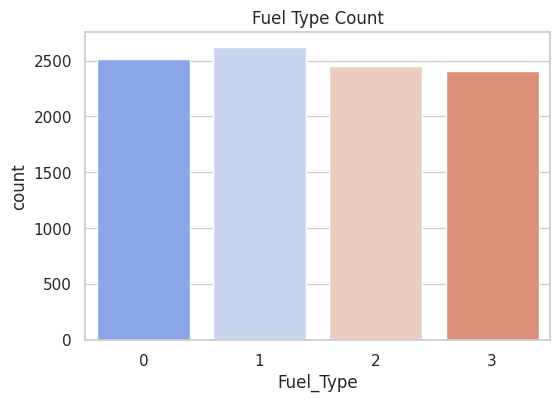

In [17]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Count Plot: Fuel Type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Fuel_Type", palette="coolwarm")
plt.title("Fuel Type Count")
plt.show()

#### Blue color show Diesel-------- Green color shows Hybrid--------Red Color shows Electric------------Yellow Color shows petrol

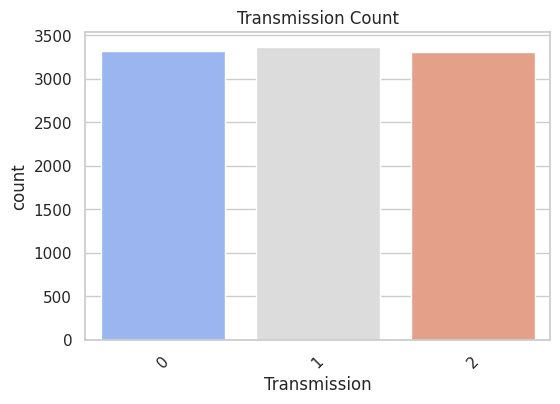

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Transmission", palette="coolwarm")
plt.title("Transmission Count")
plt.xticks(rotation=45)
plt.show()

#### -----1---Manual------2----- Automatic----3----Semi-Automatic

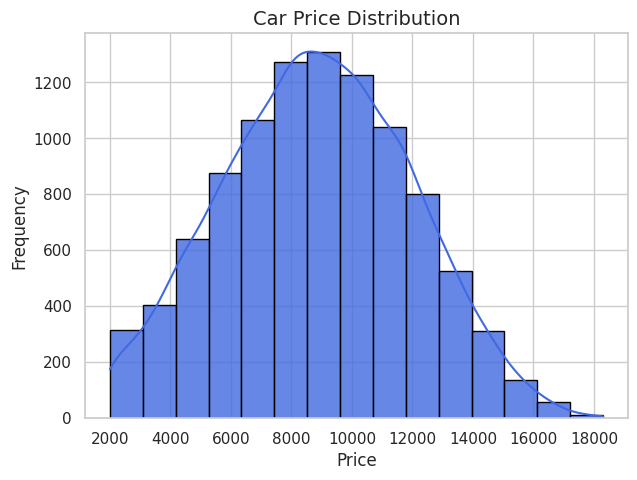

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
sns.histplot(df["Price"], bins=15, kde=True, color="royalblue", edgecolor="black", alpha=0.8)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Car Price Distribution", fontsize=14)
plt.show()

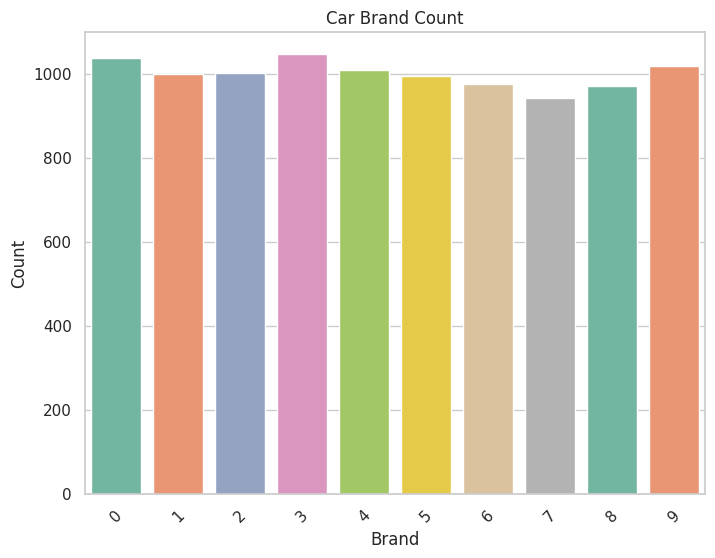

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Brand", palette="Set2")
plt.title("Car Brand Count")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()


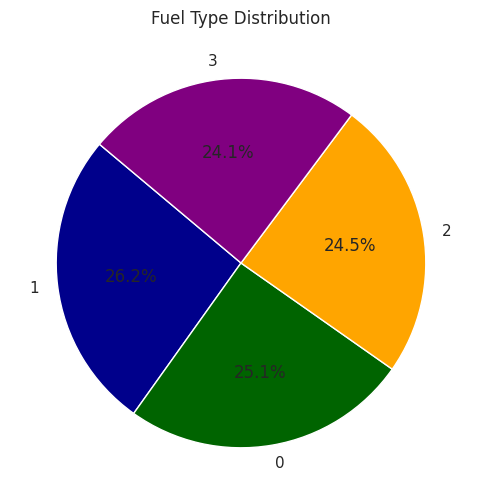

In [21]:
fuel_counts = df["Fuel_Type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=["darkblue", "darkgreen", "orange", "purple"])
plt.title("Fuel Type Distribution")
plt.show()


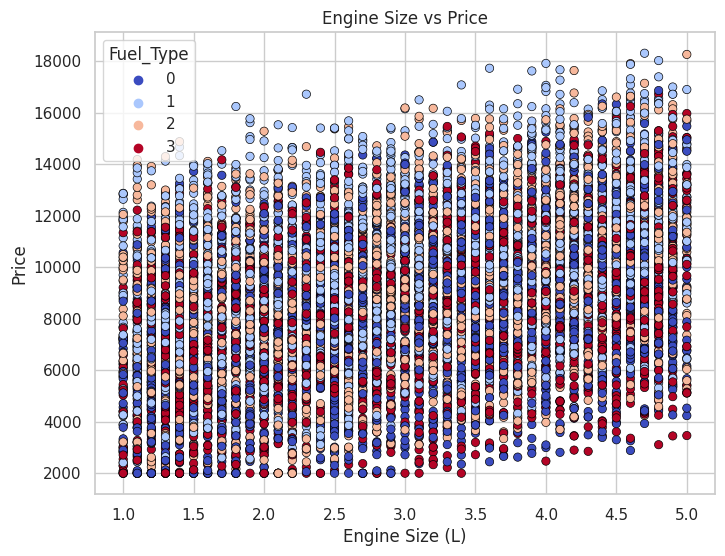

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Engine_Size", y="Price", hue="Fuel_Type", palette="coolwarm", edgecolor="black")
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price")
plt.show()

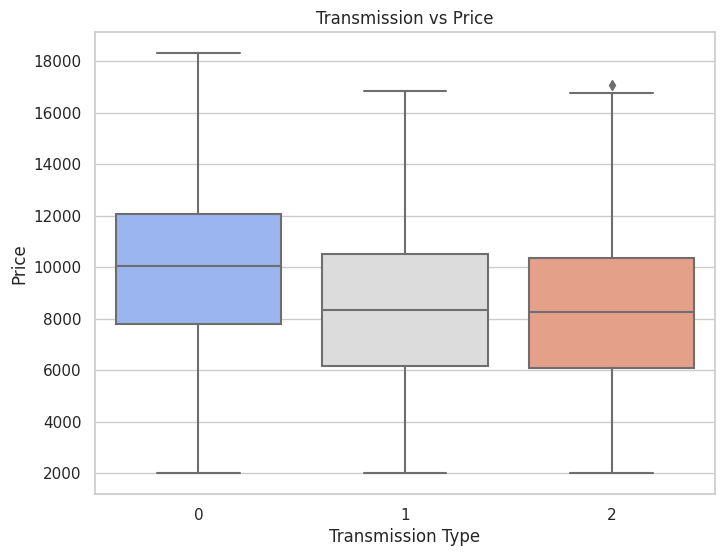

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Transmission", y="Price", palette="coolwarm")
plt.title("Transmission vs Price")
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.show()

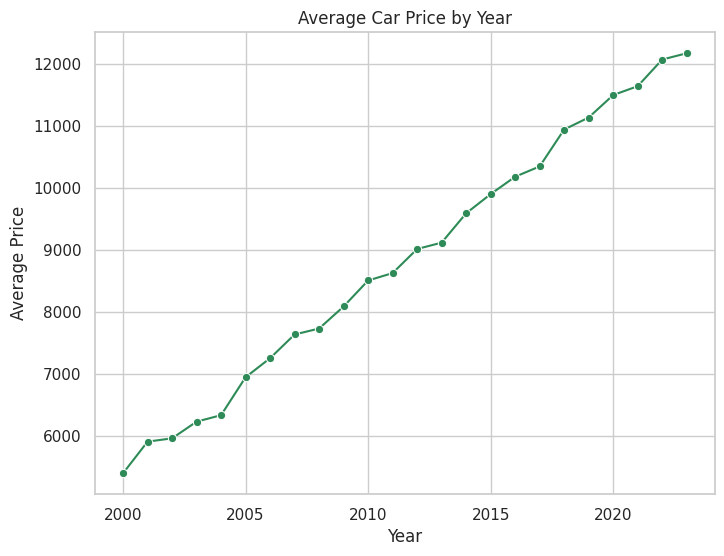

In [24]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df.groupby('Year')['Price'].mean().reset_index(), x="Year", y="Price", marker="o", color="seagreen")
plt.title("Average Car Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

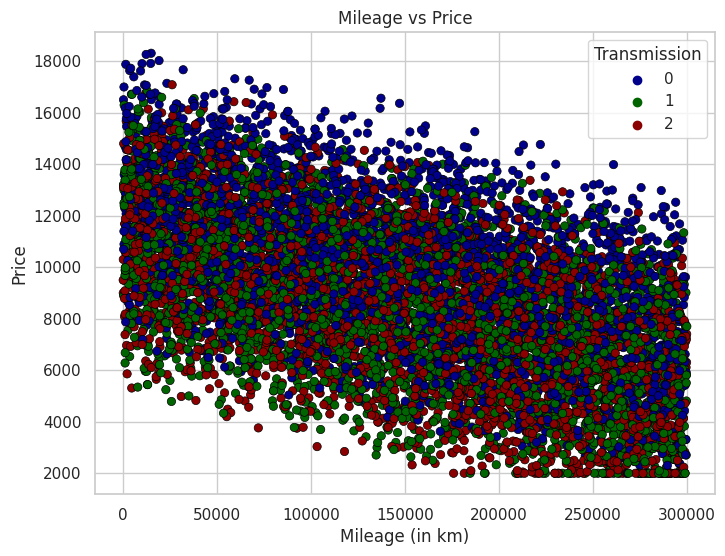

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Mileage", y="Price", hue="Transmission", palette=["darkblue", "darkgreen", "darkred"], edgecolor="black")
plt.title("Mileage vs Price")
plt.xlabel("Mileage (in km)")
plt.ylabel("Price")
plt.show()

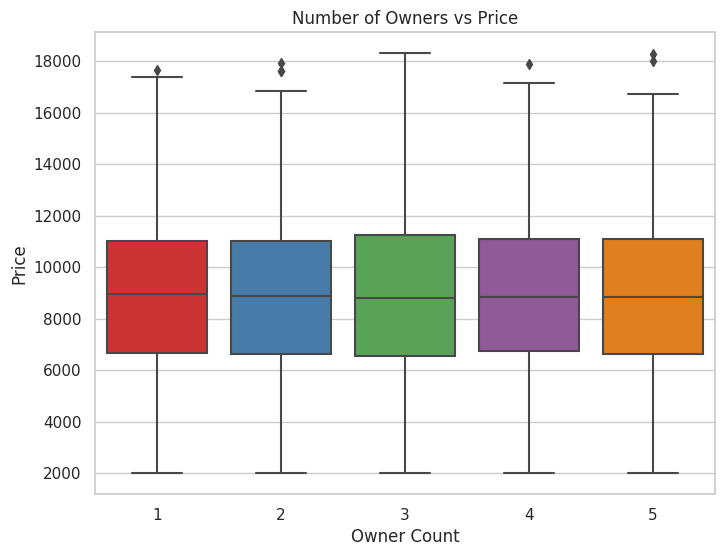

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Owner_Count", y="Price", palette="Set1")
plt.title("Number of Owners vs Price")
plt.xlabel("Owner Count")
plt.ylabel("Price")
plt.show()

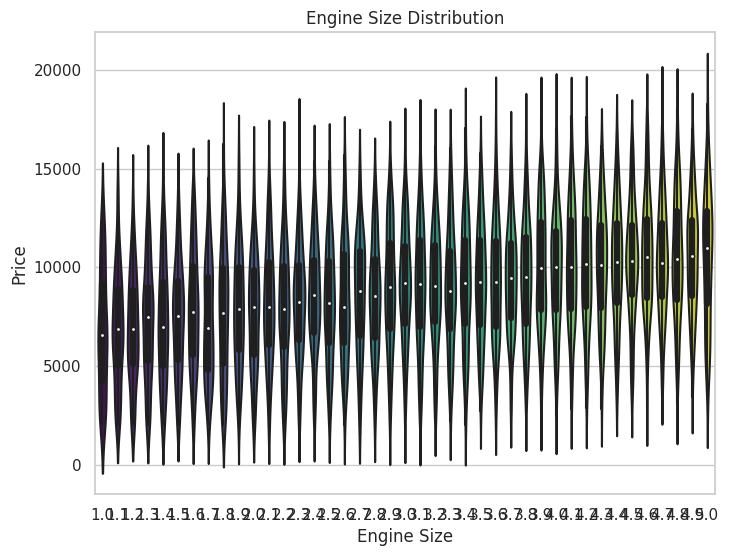

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="Engine_Size", y="Price", palette="viridis")
plt.title("Engine Size Distribution")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

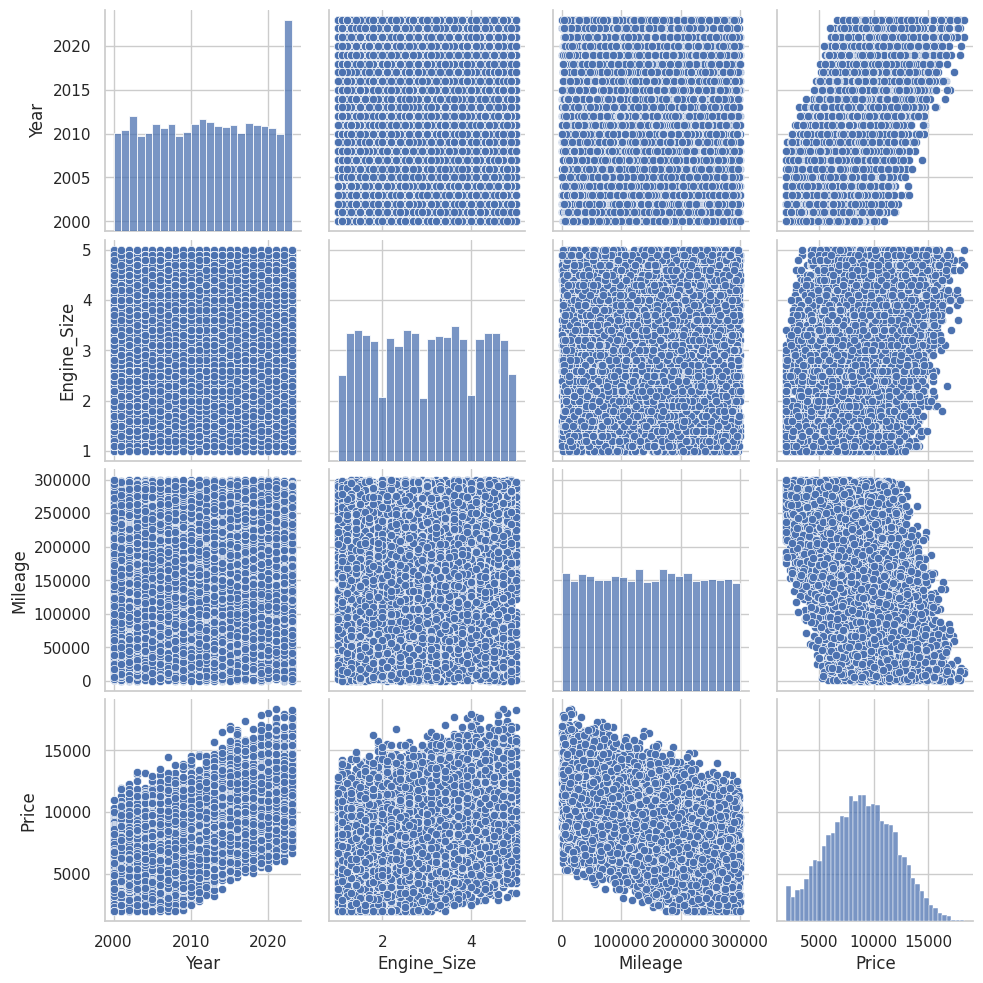

In [28]:
df_subset = df[['Year', 'Engine_Size', 'Mileage', 'Price']]  # Ensure Fuel_Type is available
sns.pairplot(df_subset)

# <p style="background-color: #ffebee; font-size: 120%; text-align: center; border-radius: 15px; color: #4A148C; font-weight: bold; font-family: 'Trebuchet MS', sans-serif; border: 5px dashed #D81B60; padding: 15px; margin: 15px; box-shadow: 4px 4px 10px rgba(216, 27, 96, 0.4);">🚀 EDA 🚀</p>


In [29]:
price_col = [col for col in df.columns if 'price' in col.lower()]
if not price_col:
    raise KeyError("No column related to 'price' found in dataset")
price_col = price_col[0]

In [30]:
X = df.drop(columns=[price_col])
y = df[price_col]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [36]:
print(f'MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}')

MAE: 370.26852, RMSE: 466.93241629544207, R2 Score: 0.9762700972791581


## Gradient boost

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [39]:
y_pred_gb = model_gb.predict(X_test)

In [40]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [41]:
print(f'Gradient Boosting - MAE: {mae_gb}, RMSE: {rmse_gb}, R2 Score: {r2_gb}')

Gradient Boosting - MAE: 181.19079325575927, RMSE: 228.1360464795766, R2 Score: 0.9943353154635411


## Gradient Boosting Regressor Performance Report

Model: Gradient Boosting Regressor

R² Score: 0.9943

Conclusion:
The Gradient Boosting Regressor has achieved an exceptionally high R² score of 0.9943, indicating that the model is able to explain about 99.43% of the variance in the target variable (car prices) based on the provided features. This is a strong indication that the model has learned the underlying patterns well, making it highly effective for predicting car prices in this dataset.

Key Points:
High Predictive Power: The R² score close to 1 suggests that the model is very accurate, with only a small fraction of variance unexplained.
Model Suitability: Gradient Boosting, with its ability to handle non-linear relationships and interactions between features, proves to be an excellent choice for structured/tabular data like this.
For further improvements, consider experimenting with hyperparameter tuning (e.g., adjusting learning rate, number of estimators, and tree depth), or trying additional techniques like feature engineering or cross-validation for more robust evaluation.

## THANK YOU!!! Pls Upvote___